In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lines = open('data/random/time_32.txt').readlines()

In [3]:
datasets = lines[0::10]
rust_time = lines[2::10]
rust_mem = lines[3::10]
python_time = lines[6::10]
python_mem = lines[7::10]

In [4]:
def extract_number(iter):
    return np.array([float(re.search(r'\d+\.?\d+', x).group(0)) for x in iter])

def extract_tree_size(iter):
    return np.array([int(re.search(r'tree_(\d+)', x).group(1)) for x in iter])

In [5]:
extract_number(python_time)

array([  51.7 ,  187.92,  735.03, 3113.72, 6435.64])

In [6]:
extract_tree_size(datasets)

array([  16,   64,  256, 1024, 2048])

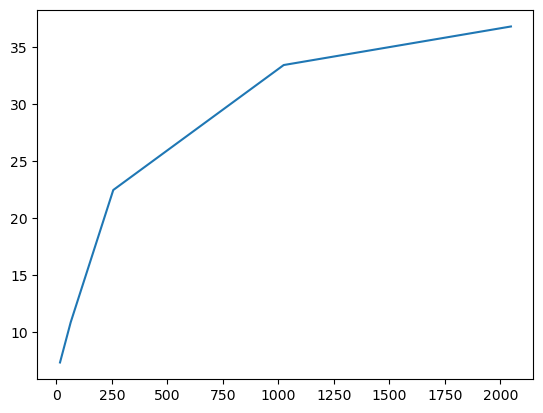

In [7]:
plt.plot(extract_tree_size(datasets), extract_number(python_time) / extract_number(rust_time), label='Python')

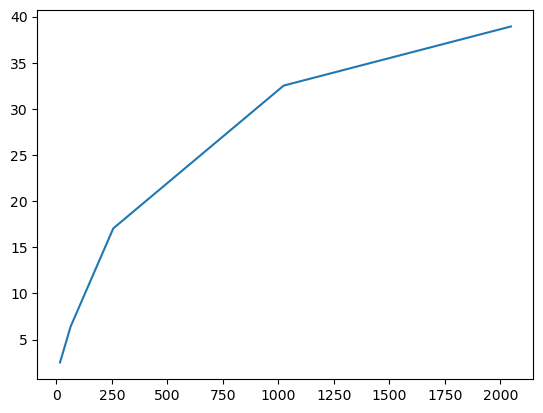

In [8]:
plt.plot(extract_tree_size(datasets), extract_number(python_mem) / extract_number(rust_mem), label='Python')

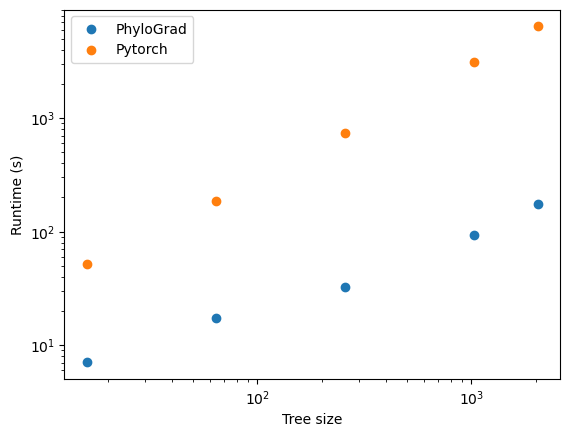

In [11]:
ax = plt.gca()

ax.scatter(extract_tree_size(datasets), extract_number(rust_time), label='PhyloGrad')
ax.scatter(extract_tree_size(datasets), extract_number(python_time), label='Pytorch')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Tree size')
ax.set_ylabel('Runtime (s)')
ax.legend()

Text(0, 0.5, 'Runtime Pytorch (s) / Runtime PhyloGrad (s)')

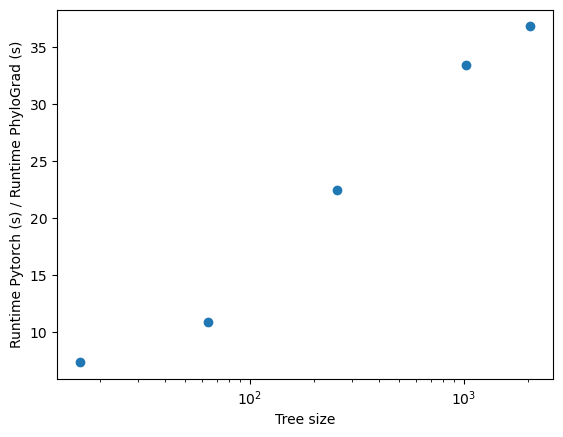

In [15]:

ax = plt.gca()

ax.scatter(extract_tree_size(datasets), extract_number(python_time) / extract_number(rust_time))
ax.set_xscale('log')
ax.set_xlabel('Tree size')
ax.set_ylabel('Runtime Pytorch (s) / Runtime PhyloGrad (s)')

Text(0, 0.5, 'Peak memory (GiB)')

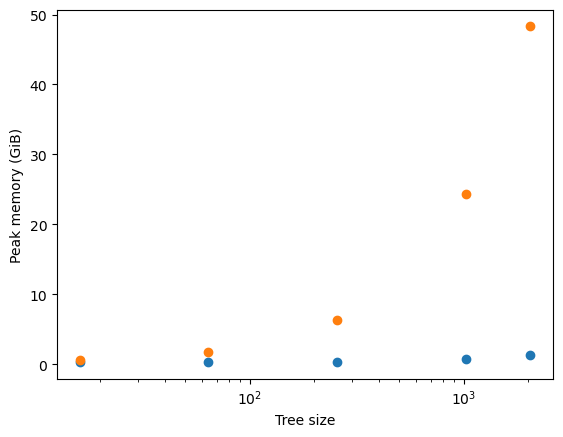

In [ ]:
ax = plt.gca()

ax.scatter(extract_tree_size(datasets), extract_number(rust_mem) / 1024**2, label='PhyloGrad')
ax.scatter(extract_tree_size(datasets), extract_number(python_mem) / 1024**2, label='Pytorch')
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Tree size')
ax.set_ylabel('Peak memory (GiB)')
ax.legend()

In [1]:
import numpy as np

In [38]:
S = np.load("tmp.npz")['S']
sqrt_pi = np.load("tmp.npz")['sqrt_pi']

In [39]:
R = np.diag(1/sqrt_pi) @ S @ np.diag(1/sqrt_pi)
Q = np.diag(1/sqrt_pi) @ S @ np.diag(sqrt_pi)
Q = Q - np.diag(np.sum(Q, axis=1))

In [40]:
np.sum(np.diag(Q) * sqrt_pi ** 2)

np.float64(-0.9999999999999999)

In [41]:
pam = [a.item() for a in R[*np.tril_indices(R.shape[0], -1)]]

In [42]:
" ".join([f"{a:.5f}" for a in pam])

'239.45838 124.25019 150.27626 206.46217 296.59002 139.89524 181.86866 105.77523 228.67914 94.27865 175.33479 247.24074 115.94771 126.26398 151.25631 86.38526 143.79058 193.58484 348.95942 97.13570 143.14225 0.04320 0.06459 0.04960 0.05706 0.04555 0.04311 0.05079 247.72913 139.63155 196.39515 146.52957 146.79766 223.34559 139.55555 0.04534 165.30236 170.49225 310.94593 276.06809 108.35173 143.20549 131.50722 0.05502 182.78465 229.85591 283.19196 109.16178 144.53639 277.12991 145.91789 218.84362 0.05475 71.27987 93.31268 141.86242 108.37516 132.55378 167.42990 236.43139 100.21093 137.51595 0.06207 160.83414 132.08181 247.30697 120.99921 119.56549 178.14741 83.28023 108.15846 270.15569 55.94028 0.04457 121.07924 132.60229 257.57495 229.12222 49.07638 94.69135 141.43941 55.09091 126.56136 214.60559 225.38087 0.05225 234.95797 121.67541 100.67285 103.57266 265.01684 89.21202 85.82117 130.45728 103.24141 130.35379 107.08524 179.02636 0.06592 205.43405 253.34423 64.13300 122.83436 199.74254 

In [43]:
" ".join([f"{a.item():.5f}" for a in sqrt_pi ** 2])

'0.00432 0.00419 0.00441 0.00409 0.00444 0.00427 0.00418 0.91906 0.00420 0.00421 0.00437 0.00383 0.00446 0.00450 0.00432 0.00433 0.00407 0.00409 0.00444 0.00422'